In [1]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(scales)
deaths <- read.csv("deaths.csv")

filtered <- deaths[ which(deaths$State == 'United States' & deaths$Age.Range == '0-84' & deaths$Benchmark=='Floating' & deaths$Locality =='All'),]


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  2.1.3     ✔ purrr   0.3.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




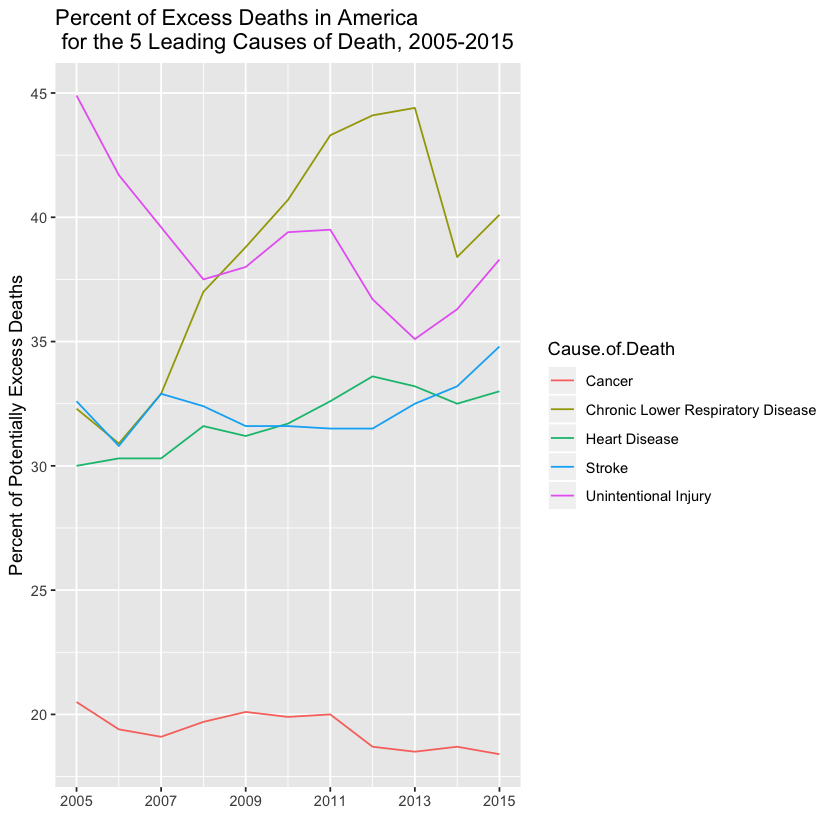

In [2]:
ggplot(data=filtered, aes(x=Year, y=Percent.Potentially.Excess.Deaths, group = Cause.of.Death, colour = Cause.of.Death)) + 
    geom_line() +
    scale_x_continuous(name = " ", breaks = c(2005, 2007, 2009, 2011, 2013, 2015)) +
    scale_y_continuous(name = "Percent of Potentially Excess Deaths", breaks = c(20, 25, 30, 35, 40, 45)) +
    ggtitle("Percent of Excess Deaths in America \n for the 5 Leading Causes of Death, 2005-2015")

In [3]:
library(reshape2)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




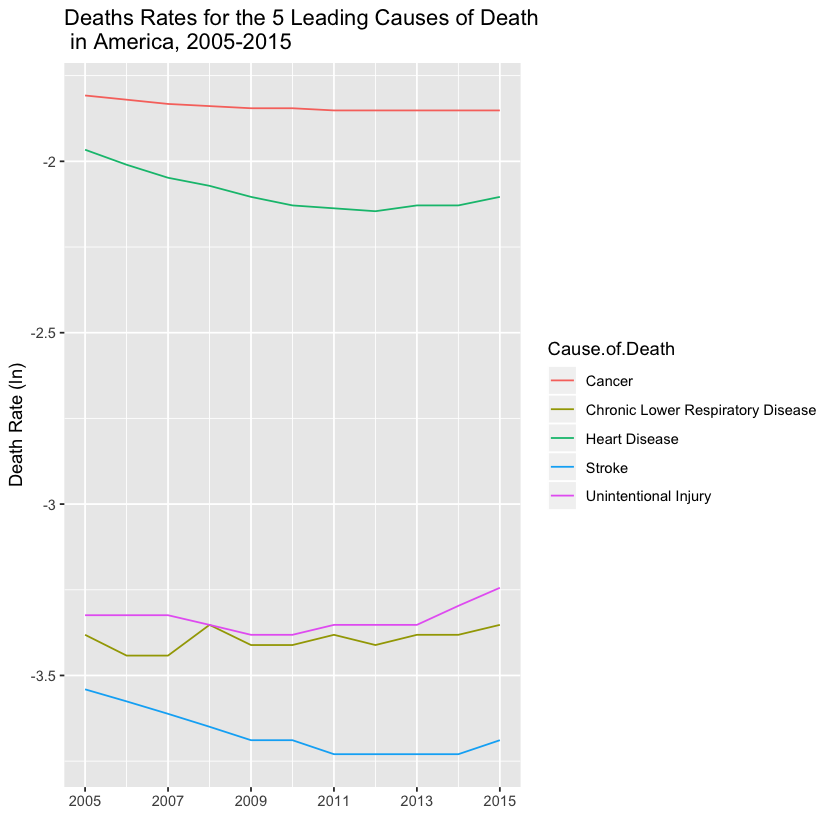

In [12]:
filtered$Death.Rate <- round((filtered$Observed.Deaths / filtered$Population) * 100, digits=3)
ggplot(data=filtered, aes(x=Year, y=Death.Rate, group = Cause.of.Death, colour = Cause.of.Death)) + 
    geom_line() + ylab("Death Rate (ln)") + xlab("Year") +
    ggtitle("Deaths Rates for the 5 Leading Causes of Death \n in America, 2005-2015") +
    scale_x_continuous(name = " ", breaks = c(2005, 2007, 2009, 2011, 2013, 2015)) +
    scale_y_continuous(trans = log_trans(), breaks = trans_breaks("log", function(x) exp(x)), labels = trans_format("log", math_format(.x)))

In [13]:
library(plotly)

In [14]:
library(latticeExtra)

heart <- filtered[which(filtered$Cause.of.Death == 'Heart Disease'),]
cancer <- filtered[which(filtered$Cause.of.Death == 'Cancer'),]
resp <- filtered[which(filtered$Cause.of.Death == 'Chronic Lower Respiratory Disease'),]
stroke <- filtered[which(filtered$Cause.of.Death == 'Stroke'),]
injury <- filtered[which(filtered$Cause.of.Death == 'Unintentional Injury'),]
# --> construct separate plots for each series
excessDeaths <- xyplot(Percent.Potentially.Excess.Deaths ~ Year, heart, aspect="xy", type = "l", lwd=2)
deathRate <- xyplot(Death.Rate ~ Year, heart, aspect="xy", type = "l", lwd=2)
 
# --> Make the plot with second y axis AND legend:
heartPlot <- doubleYScale(excessDeaths, deathRate, text = c("Percent Excess Deaths", "Death Rate") , add.ylab2 = TRUE)

In [15]:
excessDeaths2 <- xyplot(Percent.Potentially.Excess.Deaths ~ Year, cancer, aspect="xy", type = "l", lwd=2)
deathRate2 <- xyplot(Death.Rate ~ Year, cancer, aspect="xy", type = "l", lwd=2)
 
# --> Make the plot with second y axis AND legend:
cancerPlot <- doubleYScale(excessDeaths2, deathRate2, text = c("Percent Excess Deaths", "Death Rate") , add.ylab2 = TRUE)

In [16]:
excessDeaths3 <- xyplot(Percent.Potentially.Excess.Deaths ~ Year, stroke, aspect="xy", type = "l", lwd=2)
deathRate3 <- xyplot(Death.Rate ~ Year, stroke, aspect="xy", type = "l", lwd=2)
 
# --> Make the plot with second y axis AND legend:
strokePlot <- doubleYScale(excessDeaths3, deathRate3, text = c("Percent Excess Deaths", "Death Rate") , add.ylab2 = TRUE)

In [17]:
excessDeaths4 <- xyplot(Percent.Potentially.Excess.Deaths ~ Year, resp, aspect="xy", type = "l", lwd=2)
deathRate4 <- xyplot(Death.Rate ~ Year, resp, aspect="xy", type = "l", lwd=2)
 
# --> Make the plot with second y axis AND legend:
respPlot <- doubleYScale(excessDeaths4, deathRate4, text = c("Percent Excess Deaths", "Death Rate") , add.ylab2 = TRUE)

In [18]:
excessDeaths5 <- xyplot(Percent.Potentially.Excess.Deaths ~ Year, injury, aspect="xy", type = "l", lwd=2)
deathRate5 <- xyplot(Death.Rate ~ Year, injury, aspect="xy", type = "l", lwd=2)
 
# --> Make the plot with second y axis AND legend:
injuryPlot <- doubleYScale(excessDeaths5, deathRate5, add.ylab2 = TRUE)

In [19]:
filtered$Percent.Excess.Deaths.Scaled = (filterd$Percent.Potentially.Excess.Deaths - min(filtered$Percent.Potentially.Excess.Deaths))/max((filtered$Percent.Potentially.Excess.Deaths - min(filtered$Percent.Potentially.Excess.Deaths)))*100
filtered$Death.Rate.Scaled = (filtered$Death.Rate - min(filtered$Death.Rate)) / max((filtered$Death.Rate - min(filtered$Death.Rate)))*100
excessDeaths <- xyplot(Percent.Potentially.Excess.Deaths ~ Year | Cause.of.Death,filtered,type = "l", lwd=2)
deathRate <- xyplot(Death.Rate ~ Year | Cause.of.Death, filtered, type = "l", lwd=2)
 
# --> Make the plot with second y axis AND legend:
chart <- doubleYScale(excessDeaths, deathRate, text = c("Percent Excess Deaths", "Death Rate"),add.ylab2 = TRUE)
update(chart, layout=c(1,5))

ERROR: Error in eval(expr, envir, enclos): object 'filterd' not found


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



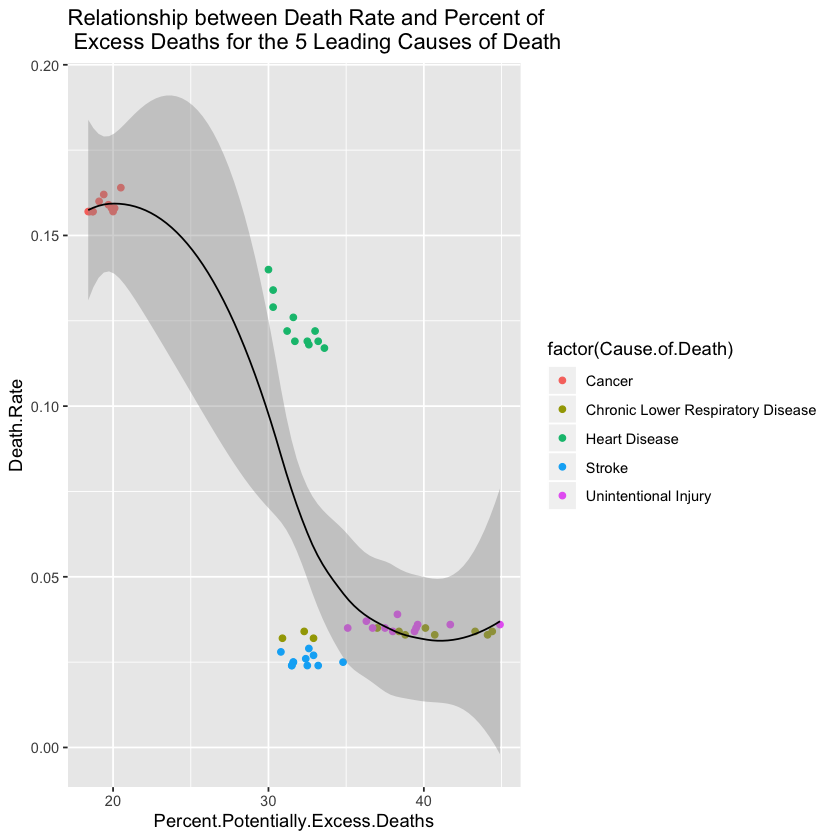

In [20]:
plt <- ggplot(filtered, aes(Percent.Potentially.Excess.Deaths, Death.Rate)) + geom_point(aes(colour=factor(Cause.of.Death)))
plt + geom_smooth(colour="black", size=0.5) + ggtitle("Relationship between Death Rate and Percent of \n Excess Deaths for the 5 Leading Causes of Death")

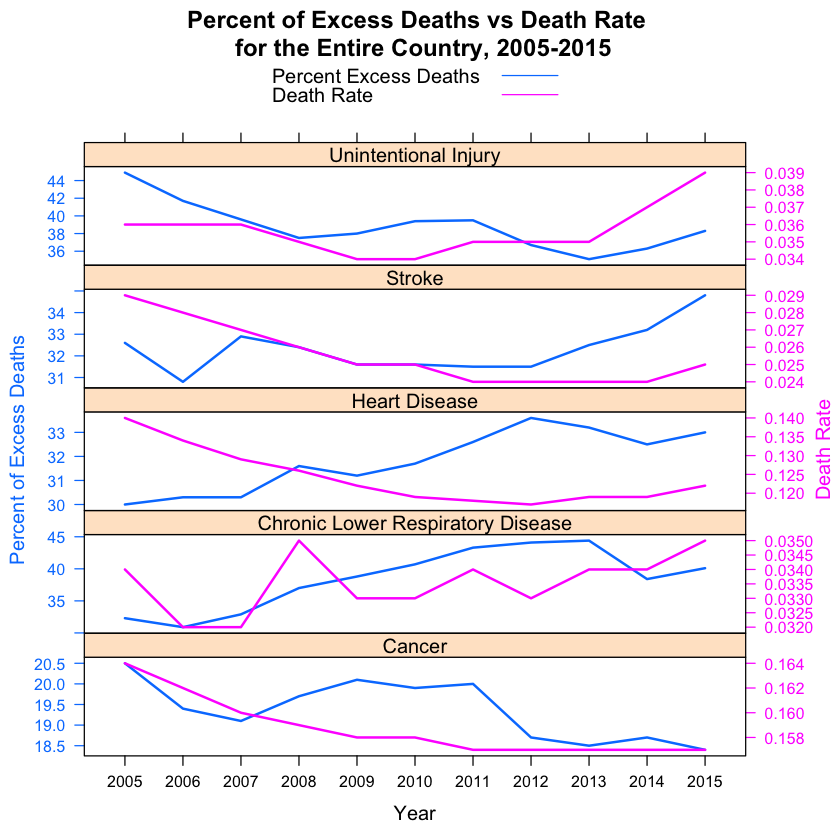

In [26]:
library(plotly)
library(latticeExtra)
library(scales)

deaths <- read.csv("deaths.csv")

filtered <- deaths[ which(deaths$State == 'United States' & deaths$Age.Range == '0-84' & deaths$Benchmark=='Floating' & deaths$Locality =='All'),]
filtered$Death.Rate <- round((filtered$Observed.Deaths / filtered$Population) * 100, digits=3)

excessDeaths <- xyplot(Percent.Potentially.Excess.Deaths ~ Year | Cause.of.Death,filtered,type = "l", scales = list(y="free",x=list(tick.number=10)), lwd=2, ylab="Percent of Excess Deaths",col.axis="blue", main="Percent of Excess Deaths vs Death Rate \n for the Entire Country, 2005-2015")
deathRate <- xyplot(Death.Rate ~ Year | Cause.of.Death, filtered, scales = list(y="free",x=list(tick.number=10)),type = "l", lwd=2, ylab="Death Rate")
 
# combine plots with two y axis and a legend
chart <- doubleYScale(excessDeaths, deathRate, text = c("Percent Excess Deaths", "Death Rate"),add.ylab2 = TRUE)
# stack the charts on top of each other
update(chart, layout=c(1,5))